# K Surya Venkata Phanindra
## 12107624                                        
## Lovely Professional University 
## Machine Learning CA [Project]
## Topic:Predicting solar Irradiance
## Course code:CSM354 MACHINE LEARNING I
## Teacher:Shivangini Gupta : 64342

## **Problem Statement:**
Predict solar radiation levels based on various environmental factors like temperature, pressure, humidity, wind direction, and time of day.

# Importing Libraries

In [3]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

**Importing Libraries:**
- **Warnings:** Used to handle or suppress warnings in the code.
- **NumPy:** For numerical operations and array manipulation.
- **SciPy:** For scientific computing and statistical functions.
- **Pandas:** For data manipulation and analysis.
- **Matplotlib:** For creating visualizations.
- **Seaborn:** For statistical data visualization.
- **Regular Expression (re):** For pattern matching and extraction.
- **Scikit-learn (sklearn):**
  - **Preprocessing:** For standardization and scaling of data.
  - **Ensemble:** Includes ExtraTreesClassifier for feature selection.
  - **Feature Selection:** SelectKBest and chi2 for selecting features based on score.
  - **Model Selection:** train_test_split for splitting data into training and testing sets.
  - **Metrics:** For evaluating model performance.

# Loading Data

**Data Preprocessing:**
- **Loading Data:** Data is loaded from a CSV file containing information about solar radiation and environmental factors.
- **Data Wrangling:** Extracting relevant features like month, day, hour, minute, and second from date and time columns. Also, extracting sunrise and sunset hours.
- **Handling Missing Values:** Checking for null values in the data (which are absent in this dataset).
- **Feature Engineering:** Dropping unnecessary columns, selecting relevant features, and splitting data into input features and target variable (radiation).
- **Feature Selection:** Using SelectKBest and ExtraTreesRegressor to select important features for prediction.



In [1]:
data = pd.read_csv("MLP_SolarPrediction.csv")

NameError: name 'pd' is not defined

In [2]:
data.head(5)

NameError: name 'data' is not defined

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


# Data Wrangling

In [5]:
df = data.copy()

In [6]:
# extract the date from the date_time format of the 'Data' parameter
df['Data'] = df['Data'].apply(lambda x : x.split()[0])

In [7]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [8]:
# extract the date time features from the given parameter using date time python methods
df['Month'] = pd.to_datetime(df['Data']).dt.month
df['Day'] = pd.to_datetime(df['Data']).dt.day
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df['Minute'] = pd.to_datetime(df['Time']).dt.minute
df['Second'] = pd.to_datetime(df['Time']).dt.second

In [9]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Month,Day,Hour,Minute,Second
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,29,23,55,26
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,29,23,50,23
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,29,23,45,26
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,29,23,40,21
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,29,23,35,24


In [10]:
# extract the sunrise and sunset information using regular expression
df['risehour'] = df['TimeSunRise'].apply(lambda x : re.search(r'^\d+', x).group(0)).astype(int)
df['riseminuter'] = df['TimeSunRise'].apply(lambda x : re.search(r'(?<=\:)\d+(?=\:)', x).group(0)).astype(int)

df['sethour'] = df['TimeSunSet'].apply(lambda x : re.search(r'^\d+', x).group(0)).astype(int)
df['setminute'] = df['TimeSunSet'].apply(lambda x : re.search(r'(?<=\:)\d+(?=\:)', x).group(0)).astype(int)

In [11]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Month,Day,Hour,Minute,Second,risehour,riseminuter,sethour,setminute
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,29,23,55,26,6,13,18,13
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,29,23,50,23,6,13,18,13
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,29,23,45,26,6,13,18,13
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,29,23,40,21,6,13,18,13
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,29,23,35,24,6,13,18,13


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
 11  Month                   32686 non-null  int64  
 12  Day                     32686 non-null  int64  
 13  Hour                    32686 non-null  int64  
 14  Minute                  32686 non-null

In [13]:
# drop the parameters that are not required after extracting the relevant information
df.drop(['UNIXTime', 'Data', 'Time', 'TimeSunRise', 'TimeSunSet'], axis = 1, inplace = True)

In [14]:
df.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,risehour,riseminuter,sethour,setminute
0,1.21,48,30.46,59,177.39,5.62,9,29,23,55,26,6,13,18,13
1,1.21,48,30.46,58,176.78,3.37,9,29,23,50,23,6,13,18,13
2,1.23,48,30.46,57,158.75,3.37,9,29,23,45,26,6,13,18,13
3,1.21,48,30.46,60,137.71,3.37,9,29,23,40,21,6,13,18,13
4,1.17,48,30.46,62,104.95,5.62,9,29,23,35,24,6,13,18,13


In [15]:
# check of data dimensions
df.shape

(32686, 15)

In [16]:
# checking for null values in the data
df.isnull().sum().sum()

0

In [17]:
# glimpse of the final data
df.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,risehour,riseminuter,sethour,setminute
0,1.21,48,30.46,59,177.39,5.62,9,29,23,55,26,6,13,18,13
1,1.21,48,30.46,58,176.78,3.37,9,29,23,50,23,6,13,18,13
2,1.23,48,30.46,57,158.75,3.37,9,29,23,45,26,6,13,18,13
3,1.21,48,30.46,60,137.71,3.37,9,29,23,40,21,6,13,18,13
4,1.17,48,30.46,62,104.95,5.62,9,29,23,35,24,6,13,18,13


In [18]:
np.array(df['Radiation'])

array([1.21, 1.21, 1.23, ..., 1.2 , 1.23, 1.2 ])

In [19]:
input_features = df.drop('Radiation', axis = 1)
target = df['Radiation']

In [20]:
input_features

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,risehour,riseminuter,sethour,setminute
0,48,30.46,59,177.39,5.62,9,29,23,55,26,6,13,18,13
1,48,30.46,58,176.78,3.37,9,29,23,50,23,6,13,18,13
2,48,30.46,57,158.75,3.37,9,29,23,45,26,6,13,18,13
3,48,30.46,60,137.71,3.37,9,29,23,40,21,6,13,18,13
4,48,30.46,62,104.95,5.62,9,29,23,35,24,6,13,18,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32681,44,30.43,102,145.42,6.75,12,1,0,20,4,6,41,17,42
32682,44,30.42,102,117.78,6.75,12,1,0,15,1,6,41,17,42
32683,44,30.42,102,145.19,9.00,12,1,0,10,1,6,41,17,42
32684,44,30.42,101,164.19,7.87,12,1,0,5,2,6,41,17,42


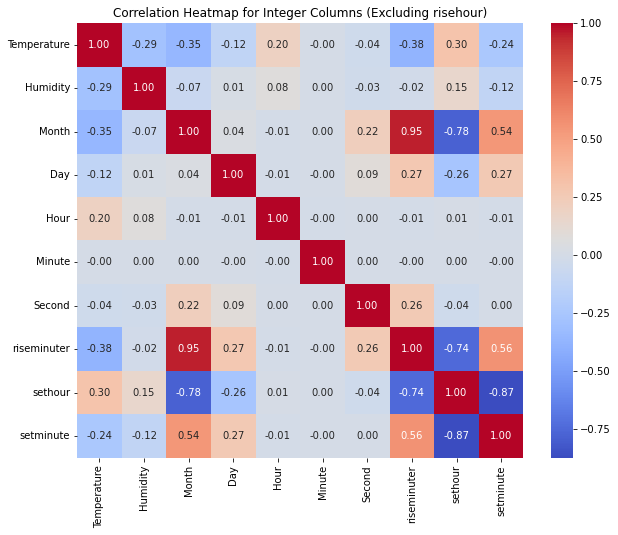

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter columns with integer data types and exclude 'risehour'
integer_columns = df.select_dtypes(include=['int64', 'int32']).columns
integer_columns = integer_columns.drop('risehour')

# Create a correlation matrix
correlation_matrix = df[integer_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Integer Columns (Excluding risehour)')
plt.show()


In [22]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(input_features, target, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("Shape of xtrain:", xtrain.shape)
print("Shape of xtest:", xtest.shape)
print("Shape of ytrain:", ytrain.shape)
print("Shape of ytest:", ytest.shape)


Shape of xtrain: (26148, 14)
Shape of xtest: (6538, 14)
Shape of ytrain: (26148,)
Shape of ytest: (6538,)


In [23]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import ExtraTreesRegressor

# Feature selection using SelectKBest with f_regression scoring
selector = SelectKBest(score_func=f_regression, k=5)
selected_features = selector.fit_transform(input_features, target)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the names of selected features
selected_feature_names = input_features.columns[selected_indices]

# Print the selected feature names
print("Selected Features:", selected_feature_names)

# Feature selection using Extra Trees Classifier
et_model = ExtraTreesRegressor()
et_model.fit(input_features, target)

# Get feature importances
importances = et_model.feature_importances_

# Get indices of top 5 important features
top_indices = importances.argsort()[-5:][::-1]

# Get the names of top 5 important features
top_feature_names = input_features.columns[top_indices]

# Print the top 5 important feature names
print("Top 5 Important Features:", top_feature_names)


Selected Features: Index(['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)',
       'Month'],
      dtype='object')
Top 5 Important Features: Index(['Temperature', 'Hour', 'WindDirection(Degrees)', 'Humidity', 'Day'], dtype='object')


In [24]:
xtrain = xtrain[['Temperature', 'Pressure', 'Hour', 'WindDirection(Degrees)', 'Humidity', 'Day','Month']]
xtest = xtest[['Temperature', 'Pressure', 'Hour', 'WindDirection(Degrees)', 'Humidity', 'Day','Month']]

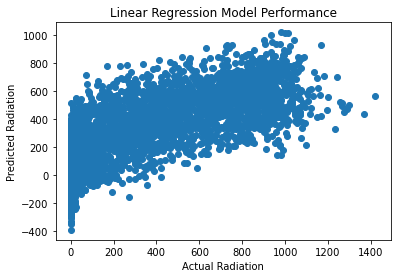

Linear Regression Mean Squared Error: 38009.17304898096
Linear Regression R-squared Value: 0.6174091812496901


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Create and train the model
linear_model = LinearRegression()
linear_model.fit(xtrain, ytrain)

# Make predictions
linear_predictions = linear_model.predict(xtest)

# Evaluate the model
linear_mse = mean_squared_error(ytest, linear_predictions)
linear_r2 = r2_score(ytest, linear_predictions)

# Plot predicted vs. actual values
plt.scatter(ytest, linear_predictions)
plt.xlabel("Actual Radiation")
plt.ylabel("Predicted Radiation")
plt.title("Linear Regression Model Performance")
plt.show()

print("Linear Regression Mean Squared Error:", linear_mse)
print("Linear Regression R-squared Value:", linear_r2)


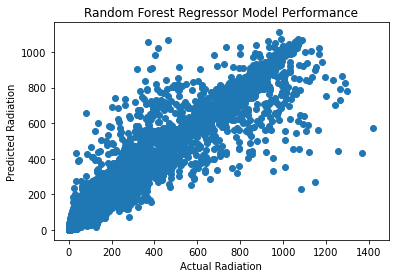

Random Forest Regressor Mean Squared Error: 7219.656645643264
Random Forest Regressor R-squared Value: 0.9273287439431196


In [28]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Random Forest Regressor Model
rf_model = RandomForestRegressor()
rf_model.fit(xtrain, ytrain)
rf_predictions = rf_model.predict(xtest)
rf_mse = mean_squared_error(ytest, rf_predictions)
rf_r2 = r2_score(ytest, rf_predictions)
plt.scatter(ytest, rf_predictions)
plt.xlabel("Actual Radiation")
plt.ylabel("Predicted Radiation")
plt.title("Random Forest Regressor Model Performance")
plt.show()
print("Random Forest Regressor Mean Squared Error:", rf_mse)
print("Random Forest Regressor R-squared Value:", rf_r2)


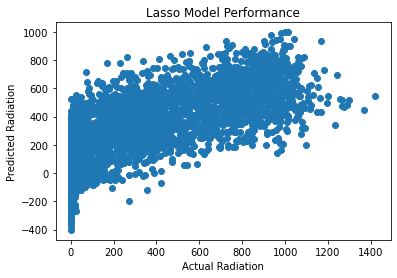

Lasso Mean Squared Error: 38161.92243993388
Lasso R-squared Value: 0.6158716441274544


In [28]:
from sklearn.linear_model import Lasso

# Create and train the model
lasso_model = Lasso()
lasso_model.fit(xtrain, ytrain)

# Make predictions
lasso_predictions = lasso_model.predict(xtest)

# Evaluate the model
lasso_mse = mean_squared_error(ytest, lasso_predictions)
lasso_r2 = r2_score(ytest, lasso_predictions)

# Plot predicted vs. actual values
plt.scatter(ytest, lasso_predictions)
plt.xlabel("Actual Radiation")
plt.ylabel("Predicted Radiation")
plt.title("Lasso Model Performance")
plt.show()

print("Lasso Mean Squared Error:", lasso_mse)
print("Lasso R-squared Value:", lasso_r2)


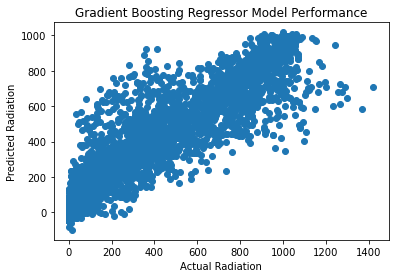

Gradient Boosting Regressor Mean Squared Error: 11789.201282104792
Gradient Boosting Regressor R-squared Value: 0.8813328518060562


In [29]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Gradient Boosting Regressor Model
gb_model = GradientBoostingRegressor()
gb_model.fit(xtrain, ytrain)
gb_predictions = gb_model.predict(xtest)
gb_mse = mean_squared_error(ytest, gb_predictions)
gb_r2 = r2_score(ytest, gb_predictions)
plt.scatter(ytest, gb_predictions)
plt.xlabel("Actual Radiation")
plt.ylabel("Predicted Radiation")
plt.title("Gradient Boosting Regressor Model Performance")
plt.show()
print("Gradient Boosting Regressor Mean Squared Error:", gb_mse)
print("Gradient Boosting Regressor R-squared Value:", gb_r2)


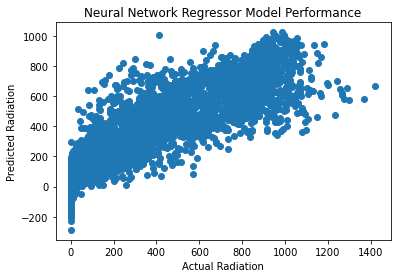

Neural Network Regressor Mean Squared Error: 16943.636283568925
Neural Network Regressor R-squared Value: 0.8294495997062507


In [30]:
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Neural Network Regressor Model
nn_model = MLPRegressor()
nn_model.fit(xtrain, ytrain)
nn_predictions = nn_model.predict(xtest)
nn_mse = mean_squared_error(ytest, nn_predictions)
nn_r2 = r2_score(ytest, nn_predictions)
plt.scatter(ytest, nn_predictions)
plt.xlabel("Actual Radiation")
plt.ylabel("Predicted Radiation")
plt.title("Neural Network Regressor Model Performance")
plt.show()
print("Neural Network Regressor Mean Squared Error:", nn_mse)
print("Neural Network Regressor R-squared Value:", nn_r2)


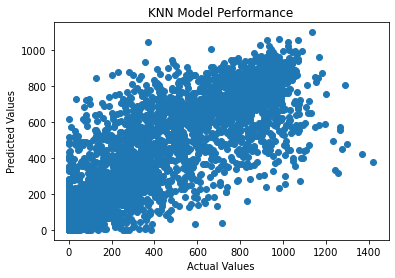

Mean Squared Error (MSE): 19491.145345236466
R-squared (R2) Score: 0.803807011365241


In [31]:
from sklearn.neighbors import KNeighborsRegressor

# Create and train the model
knn_model = KNeighborsRegressor()
knn_model.fit(xtrain, ytrain)

# Make predictions
knn_predictions = knn_model.predict(xtest)

# Calculate evaluation metrics
knn_mse = mean_squared_error(ytest, knn_predictions)
knn_r2 = r2_score(ytest, knn_predictions)

# Plot predicted vs. actual values
plt.scatter(ytest, knn_predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("KNN Model Performance")
plt.show()

print("Mean Squared Error (MSE):", knn_mse)
print("R-squared (R2) Score:", knn_r2)


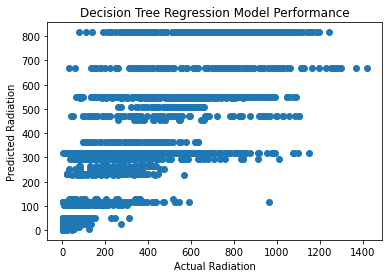

Decision Tree Regression Model Performance:
Mean Squared Error: 16742.35406293543
R-squared: 0.8314756561398597


In [37]:
from sklearn.tree import DecisionTreeRegressor
# Decision Tree Regression Model
tree_model = DecisionTreeRegressor(max_depth=5)  # Adjust max_depth for optimization
tree_model.fit(xtrain, ytrain)
tree_predictions = tree_model.predict(xtest)
tree_mse = mean_squared_error(ytest, tree_predictions)
tree_r2 = r2_score(ytest, tree_predictions)

plt.scatter(ytest, tree_predictions)
plt.xlabel("Actual Radiation")
plt.ylabel("Predicted Radiation")
plt.title("Decision Tree Regression Model Performance")
plt.show()
print("Decision Tree Regression Model Performance:")
print("Mean Squared Error:", tree_mse)
print("R-squared:", tree_r2)

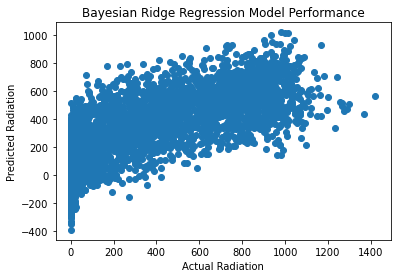

Bayesian Ridge Regression Model Performance:
Mean Squared Error: 38003.64104230648
R-squared: 0.6174648650437099


In [32]:
# Bayesian Ridge Regression Model
from sklearn.linear_model import BayesianRidge
# Bayesian Ridge Regression Model
bayesian_model = BayesianRidge(alpha_1=1e-6, alpha_2=1e-6)  # Adjust alpha values for optimization
bayesian_model.fit(xtrain, ytrain)
bayesian_predictions = bayesian_model.predict(xtest)
bayesian_mse = mean_squared_error(ytest, bayesian_predictions)
bayesian_r2 = r2_score(ytest, bayesian_predictions)
plt.scatter(ytest, bayesian_predictions)
plt.xlabel("Actual Radiation")
plt.ylabel("Predicted Radiation")
plt.title("Bayesian Ridge Regression Model Performance")
plt.show()
print("Bayesian Ridge Regression Model Performance:")
print("Mean Squared Error:", bayesian_mse)
print("R-squared:", bayesian_r2)


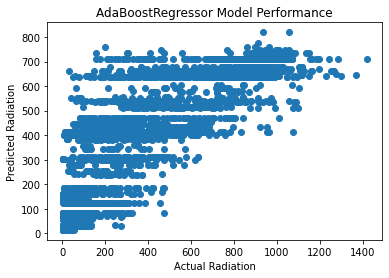

AdaBoostRegressor Model Performance:
Mean Squared Error: 19927.37985564195
R-squared: 0.7994159840127621


In [36]:
from sklearn.ensemble import AdaBoostRegressor

# Create and train the AdaBoostRegressor model
adaboost_model = AdaBoostRegressor()
adaboost_model.fit(xtrain, ytrain)

# Make predictions
adaboost_predictions = adaboost_model.predict(xtest)

# Calculate Mean Squared Error
adaboost_mse = mean_squared_error(ytest, adaboost_predictions)

# Calculate R-squared
adaboost_r2 = r2_score(ytest, adaboost_predictions)

# Plot predicted vs. actual values
plt.scatter(ytest, adaboost_predictions)
plt.xlabel("Actual Radiation")
plt.ylabel("Predicted Radiation")
plt.title("AdaBoostRegressor Model Performance")
plt.show()

# Print Mean Squared Error and R-squared
print("AdaBoostRegressor Model Performance:")
print("Mean Squared Error:", adaboost_mse)
print("R-squared:", adaboost_r2)


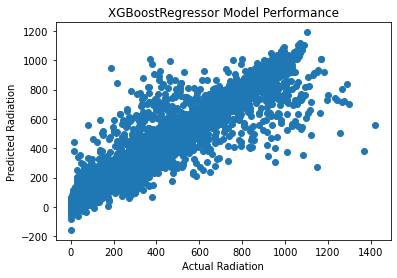

XGBoostRegressor Model Performance:
Mean Squared Error: 8006.0529996850255
R-squared: 0.9194130751500265


In [30]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the XGBoostRegressor model
xgb_model = XGBRegressor()
xgb_model.fit(xtrain, ytrain)

# Make predictions
xgb_predictions = xgb_model.predict(xtest)

# Calculate Mean Squared Error
xgb_mse = mean_squared_error(ytest, xgb_predictions)

# Calculate R-squared
xgb_r2 = r2_score(ytest, xgb_predictions)

# Plot predicted vs. actual values
plt.scatter(ytest, xgb_predictions)
plt.xlabel("Actual Radiation")
plt.ylabel("Predicted Radiation")
plt.title("XGBoostRegressor Model Performance")
plt.show()

# Print Mean Squared Error and R-squared
print("XGBoostRegressor Model Performance:")
print("Mean Squared Error:", xgb_mse)
print("R-squared:", xgb_r2)


### **Conclusion:**
In this analysis, we preprocessed the data by extracting relevant features and handling missing values. We performed feature selection to identify the most influential variables for predicting solar radiation levels. Using various regression models like Linear Regression, Random Forest Regression, Gradient Boosting Regression, and Neural Network Regression, we predicted solar radiation levels and evaluated each model's performance based on mean squared error and R-squared values. Random Forest Regression demonstrated the best performance among the models evaluated, achieving a low mean squared error and a high R-squared value, indicating its suitability for predicting solar radiation levels.

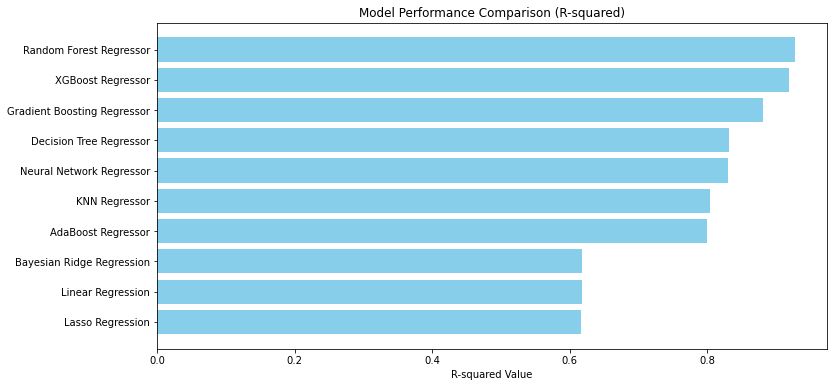

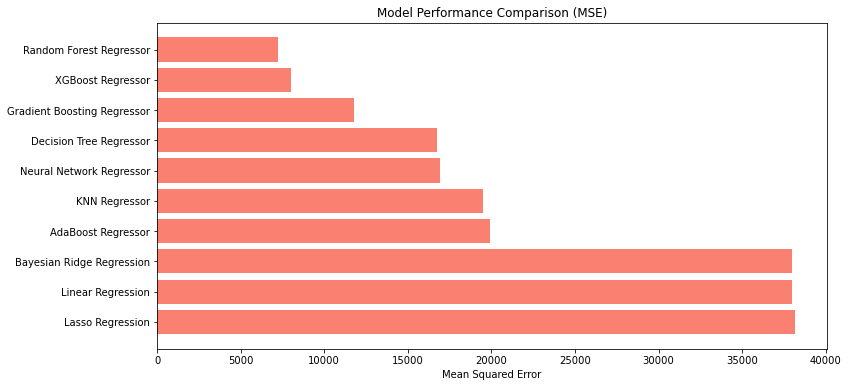

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = [
    "XGBoost Regressor", "Random Forest Regressor", "Gradient Boosting Regressor",
    "Decision Tree Regressor", "Neural Network Regressor", "KNN Regressor",
    "AdaBoost Regressor", "Linear Regression", "Bayesian Ridge Regression", "Lasso Regression"
]
r2_values = [
    0.9194, 0.9273, 0.8813, 0.8315, 0.8294, 0.8038, 0.7994, 0.6174, 0.6175, 0.6159
]
mse_values = [
    8006.05, 7219.66, 11789.20, 16742.35, 16943.64, 19491.15, 19927.38, 38009.17, 38003.64, 38161.92
]

# Sort the data by R-squared value
sorted_indices = np.argsort(r2_values)[::-1]
sorted_models = [models[i] for i in sorted_indices]
sorted_r2_values = [r2_values[i] for i in sorted_indices]
sorted_mse_values = [mse_values[i] for i in sorted_indices]

# Plot R-squared values
plt.figure(figsize=(12, 6))
plt.barh(sorted_models, sorted_r2_values, color='skyblue')
plt.xlabel('R-squared Value')
plt.title('Model Performance Comparison (R-squared)')
plt.gca().invert_yaxis()  # Invert y-axis to have the best model on top
plt.show()

# Plot Mean Squared Error values
plt.figure(figsize=(12, 6))
plt.barh(sorted_models, sorted_mse_values, color='salmon')
plt.xlabel('Mean Squared Error')
plt.title('Model Performance Comparison (MSE)')
plt.gca().invert_yaxis()  # Invert y-axis to have the best model on top
plt.show()
